<a href="https://colab.research.google.com/github/jirvingphd/fsds_pt_100719_cohort_notes/blob/master/section_08_Multiple_Regression_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION 08: MULTIPLE REGRESSION Part 3


## LEARNING OBJECTIVES:
- Discuss the remaining topics from section 08:
    - Using `train_test_split` and K-Fold Validation:

### PREVIOUS TOPICS:

### Part 1:
- Multiple Linear Regression
    - How equation for single variable $ y=mx+b$ becomes:<br> $ \hat Y = \beta_0+\beta_1X_1 + \beta_2X_2+...+\beta_nX_n $
- Dealing with Categorical Variables
    - Label Encoding 
    - One-Hot / Dummy Encoding

### Part 2 [Last class]:
- Multicollinearity of Features
- Feature Scaling & Normalization
- Multiple Linear Regression in Statsmodels
- Model Diagnostics

### Part 3: 
- Model Fit and Validation
    - `train_test_split`
    - K-Fold Validation


# PREVIOUSLY ON...

## Regression Assumptions



### 1. Linearity

> The linearity assumptions requires that there is a **linear relationship** between the response variable (Y) and predictor (X). Linear means that the change in Y by 1-unit change in X, is constant. 


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-regression-assumptions-online-ds-ft-100719/master/images/lin_2.png" width="800">



### 2. Normality 


> The normality assumption states that the **model residuals** should follow a normal distribution

- Note that the normality assumption talks about the **model residuals** and _not_ about the distributions of the **variables**! 
- In general, data scientists will often check the distributions of the variables as well. 
- **The easiest way to check for the normality assumption is with histograms or a Q-Q-Plots.**

<!-- 
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-regression-assumptions-online-ds-ft-100719/master/images/inhouse_histo.png" width="800"> -->

#### Q-Q Plots

>In statistics, a Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.

- The Q-Q plot (quantile-quantile plot) is used to help assess if a sample comes from a known distribution such as a normal distribution. 
- For regression, when checking if the data in this sample is normally distributed, we can use a Normal Q-Q plot to test that assumption. Remember that this is just a visual check, so the interpretation remains subjective. 


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-regression-assumptions-online-ds-ft-100719/master/images/inhouse_qq_plots.png" width="600">

In the context of normality of residuals, Q-Q plots can help you validate the assumption of normally distributed residuals. It uses standardized values of residuals to determine the normal distribution of errors. Ideally, this plot should show a straight line. A curved, distorted line suggests residuals have a non-normal distribution.[Here is a good article](https://data.library.virginia.edu/understanding-q-q-plots/) explaining the interpretation of Q-Q plots in detail. 


### 3. Homoscedasticity 

> _Heteroscedasticity_ (also spelled heteroskedasticity) refers to the circumstance in which the dependent variable is unequal across the range of values of the predictor(s).

When there is heteroscedasticity in the data, a scatterplot of these variables will often create a cone-like shape. The scatter of the dependent variable widens or narrows as the value of the independent variable increases. 

The inverse of heteroscedasticity is _homoscedasticity_, which indicates that a dependent variable's variability is equal across values of the independent variable. **Homoscedasticity is the third assumption necessary when creating a linear regression model.**

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-regression-assumptions-online-ds-ft-100719/master/images/homo_2.png" width="700">

**A scatter plot is good way to check whether the data are homoscedastic (meaning the residuals are equal across the regression line).**


## 4th Assumption: No Multicollinearity between predictor variables
- An additional concern to check for.
- Use df.corr() and sns.heatmap() to check/


In [35]:
!pip install -U fsds_100719
from fsds_100719.imports import *

Requirement already up-to-date: fsds_100719 in /usr/local/lib/python3.6/dist-packages (0.4.19)


In [36]:
df = fs.datasets.load_boston(verbose=False)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [37]:
## Correlation Matrix
corr = np.abs(df.corr().round(3))
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000,0.200,0.407,0.056,0.421,0.219,0.353,0.380,0.626,0.583,0.290,0.385,0.456,0.388
ZN,0.200,1.000,0.534,0.043,0.517,0.312,0.570,0.664,0.312,0.315,0.392,0.176,0.413,0.360
INDUS,0.407,0.534,1.000,0.063,0.764,0.392,0.645,0.708,0.595,0.721,0.383,0.357,0.604,0.484
CHAS,0.056,0.043,0.063,1.000,0.091,0.091,0.087,0.099,0.007,0.036,0.122,0.049,0.054,0.175
NOX,0.421,0.517,0.764,0.091,1.000,0.302,0.731,0.769,0.611,0.668,0.189,0.380,0.591,0.427
RM,0.219,0.312,0.392,0.091,0.302,1.000,0.240,0.205,0.210,0.292,0.356,0.128,0.614,0.695
AGE,0.353,0.570,0.645,0.087,0.731,0.240,1.000,0.748,0.456,0.506,0.262,0.274,0.602,0.377
DIS,0.380,0.664,0.708,0.099,0.769,0.205,0.748,1.000,0.495,0.534,0.232,0.292,0.497,0.250
RAD,0.626,0.312,0.595,0.007,0.611,0.210,0.456,0.495,1.000,0.910,0.465,0.444,0.489,0.382
TAX,0.583,0.315,0.721,0.036,0.668,0.292,0.506,0.534,0.910,1.000,0.461,0.442,0.544,0.469


(14, -0.5)

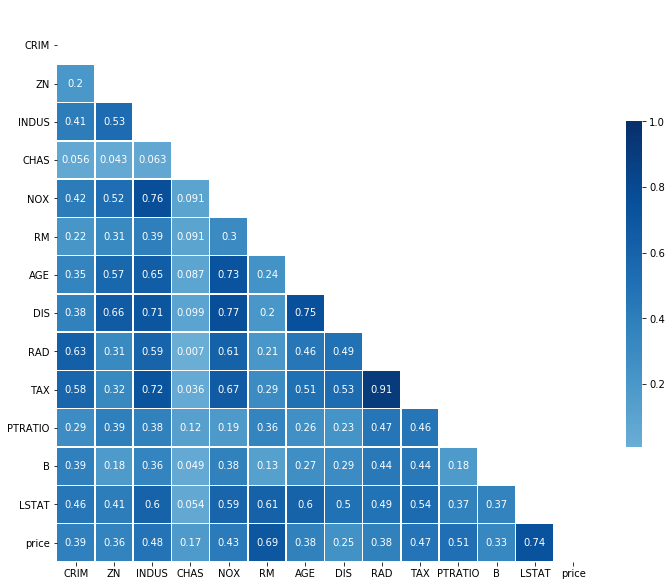

In [38]:
fig, ax = plt.subplots(figsize=(12,12))


mask= np.zeros_like(corr, dtype=np.bool)
idx = np.triu_indices_from(mask)
mask[idx] = True

sns.heatmap(corr,annot=True,square=True,mask=mask,cmap='Blues',
            center=0,ax=ax,linewidths=.5, cbar_kws={"shrink": .5})
ax.set_ylim(len(corr),-0.5,0.5)

## Feature scaling and normalization

### Log transformation

As seen in the previous lesson, a log transformation is a very useful tool when you have data that clearly does not follow a normal distribution. Log transformation can help reduce skewness when you have skewed data, and can help reducing variability of data. 


### Min-max scaling

When performing min-max scaling, you can transform x to get the transformed $x'$ by using the formula:

$$x' = \dfrac{x - \min(x)}{\max(x)-\min(x)}$$

This way of scaling brings all values between 0 and 1. 

### Standardization

When 

$$x' = \dfrac{x - \bar x}{\sigma}$$

x' will have mean $\mu = 0$ and $\sigma = 1$

Note that standardization does not make data $more$ normal, it will just change the mean and the standard error!

### Mean normalization
When performing mean normalization, you use the following formula:
$$x' = \dfrac{x - \text{mean}(x)}{\max(x)-\min(x)}$$

The distribution will have values 
between -1 and 1, and a mean of 0.


# 

# Sect 08: Multiple Linear Regression - Pt 3

# The Need for Model Validation



<img src="https://raw.githubusercontent.com/jirvingphd/dsc-regression-model-validation-online-ds-ft-100719/master/images/new_overfit_underfit.png">

## `train_test_split`

Scikit Learn's `train_test_split` function divides our data into a training set and a test set.
- We use the training set to train our model. So far we have used _all_ of the data as our training set. 
- We use the test set to judge the quality of our model's predictions for data it has never seen before.


In [0]:
from sklearn.model_selection import train_test_split

X = df.drop('price',axis=1).values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#, random_state=42)

In [53]:
## Examining the shape of our training and test set
var_name = ['X_train', 'X_test', 'y_train', 'y_test']
var_list = [X_train, X_test, y_train, y_test]
var_dict = dict(zip(var_name,var_list))


for name,var in var_dict.items():
    print(f"\nVariable: {name}")
    print(f"Data type: {type(var)}")
    print(f"Data Shape: {var.shape}")



Variable: X_train
Data type: <class 'numpy.ndarray'>
Data Shape: (404, 13)

Variable: X_test
Data type: <class 'numpy.ndarray'>
Data Shape: (102, 13)

Variable: y_train
Data type: <class 'numpy.ndarray'>
Data Shape: (404,)

Variable: y_test
Data type: <class 'numpy.ndarray'>
Data Shape: (102,)


In [0]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error,r2_score

train_mse = mean_squared_error(y_train, y_hat_train)
train_r2 = r2_score(y_train,y_hat_train)

test_mse = mean_squared_error(y_test, y_hat_test)
test_r2 = r2_score(y_test, y_hat_test)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

print('\nTrain R-Squared:', train_r2)
print('Test R-squared:', test_r2)

Train Mean Squarred Error: 23.399483061576827
Test Mean Squarred Error: 17.118722213679156

Train R-Squared: 0.7342289370210557
Test R-squared: 0.7541400047667577


# Cross-Validation / K-Fold Validation

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-cross-validation-online-ds-pt-100719/master/images/new_cross-val-graphic.png" width=700>

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
# cross_va

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))#'r2'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))#r2'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

print('CV RESULTS')
print(f"Folds=5, score={cv_5_results}")
print(f"Folds=10, score={cv_10_results}")
print(f"Folds=20, score={cv_20_results}")

CV RESULTS
Folds=5, score=-37.131807467699055
Folds=10, score=-34.705255944524914
Folds=20, score=-31.8864390219447


# MOD 1 PROJECT TIME!
